In [ ]:
# Model hazƒ±rlayark…ôn …ôn az iki model yaratmaq lazƒ±mdƒ±r --
# 1 baseline model v…ô 1 daha yax≈üƒ± performans g√∂st…ôr…ôn model (Reqressiya, klassifikasiya, klasterinq m…ôs…ôl…ôl…ôrind…ô).
# ƒ∞deal klaster sayƒ±nƒ± se√ß…ôrk…ôn …ôn az iki metod istifad…ô etm…ôk lazƒ±mdƒ±r (Klasterinq m…ôs…ôl…ôsind…ô).

In [ ]:
!kaggle datasets download sehriyarmemmedli/binaaz-rent-project #Kaggle Datasetinin Y√ºkl…ônm…ôsi
!unzip binaaz-rent-project.zip #Zip Faylƒ±nƒ±n A√ßƒ±lmasƒ±

Dataset URL: https://www.kaggle.com/datasets/sehriyarmemmedli/binaaz-rent-project
,License(s): unknown
,binaaz-rent-project.zip: Skipping, found more recently modified local copy (use --force to force download)
,Archive:  binaaz-rent-project.zip
,replace house_rent.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#kitabxanalar import olunur
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/house_rent.csv")  # Dataset y√ºkl…ônir

<ipython-input-37-6b00c16fed50>:5: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
,  df=pd.read_csv("/content/house_rent.csv")  # Dataset y√ºkl…ônir


In [ ]:
df

id_x           rel_url  \
0      ab0c8405-2ffd-4c97-bc11-8251bcd66a00   /kiraye?page=64   
1      9c448fe1-9d6b-4edc-a707-8941f718edff   /kiraye?page=64   
2      c432b5fc-a490-4f90-bb49-884aa589950d   /kiraye?page=64   
3      8d7db8f6-eea5-4235-9c52-e748b7f6ab74   /kiraye?page=64   
4      1a145395-63f3-4eb0-940b-fa449fa63a43   /kiraye?page=64   
...                                     ...               ...   
33890  92849b3f-c70e-48fd-8dea-7502515a76c1  /kiraye?page=102   
33891  585e8d25-b407-42c7-ace8-7c00d3063970  /kiraye?page=102   
33892  35d7f87f-274d-47f0-9e23-86b63c3650e8  /kiraye?page=102   
33893  225a47f4-fa7f-4465-82fc-56eaa6e2e851  /kiraye?page=102   
33894  6af00c0b-9f0a-468e-afb2-638464c6035c  /kiraye?page=102   

      estate_rel_url_x              datetime_scrape_x   price currency_x  \
0       /items/4660031  2024-10-05 22:28:16.668326+00   219.0        AZN   
1       /items/4669283  2024-10-05 22:28:16.668326+00   700.0        AZN   
2       /items/4650898  2024-10-05 22:28:16.668326+00  1500.0        AZN   
3       /items/4669259  2024-10-05 22:28:16.668326+00  1500.0        AZN   
4       /items/4655661  2024-10-05 22:28:16.668326+00  1000.0        AZN   
...                ...                            ...     ...        ...   
33890   /items/4283157     2024-11-19 20:54:12.281354   800.0        AZN   
33891   /items/4773425     2024-11-19 20:54:12.281354  1500.0        AZN   
33892   /items/4773422     2024-11-19 20:54:12.281354  1400.0        AZN   
33893   /items/4773421     2024-11-19 20:54:12.281354  2500.0        AZN   
33894   /items/4773419     2024-11-19 20:54:12.281354  1300.0        AZN   

      billing_cycle_x     location                       attributes  \
0                  ay   G…ônclik m.   3 otaqlƒ±, 198 m¬≤, 5/16 m…ôrt…ôb…ô   
1                  ay  8 Noyabr m.   2 otaqlƒ±, 90 m¬≤, 14/17 m…ôrt…ôb…ô   
2                  ay    Nizami m.   3 otaqlƒ±, 170 m¬≤, 4/17 m…ôrt…ôb…ô   
3                  ay     Bayƒ±l q.   2 otaqlƒ±, 80 m¬≤, 13/16 m…ôrt…ôb…ô   
4                  ay    N…ôsimi r.    2 otaqlƒ±, 70 m¬≤, 6/11 m…ôrt…ôb…ô   
...               ...          ...                              ...   
33890              ay    N…ôsimi r.  3 otaqlƒ±, 200 m¬≤, 15/18 m…ôrt…ôb…ô   
33891              ay     Sahil m.   2 otaqlƒ±, 110 m¬≤, 8/17 m…ôrt…ôb…ô   
33892              ay    28 May m.  4 otaqlƒ±, 200 m¬≤, 12/18 m…ôrt…ôb…ô   
33893              ay   ∆èhm…ôdli m.                           120 m¬≤   
33894              ay    N…ôsimi r.   3 otaqlƒ±, 90 m¬≤, 15/16 m…ôrt…ôb…ô   

               city_when  ... Binanƒ±n n√∂v√º   Kateqoriya  M…ôrt…ôb…ô Otaq sayƒ±  \
0      Bakƒ±, d√ºn…ôn 23:48  ...          NaN  Yeni tikili   5 / 16       3.0   
1      Bakƒ±, d√ºn…ôn 23:45  ...          NaN  Yeni tikili  14 / 17       2.0   
2      Bakƒ±, d√ºn…ôn 23:17  ...          NaN  Yeni tikili   4 / 17       3.0   
3      Bakƒ±, d√ºn…ôn 23:15  ...          NaN  Yeni tikili  13 / 16       2.0   
4      Bakƒ±, d√ºn…ôn 23:13  ...          NaN  Yeni tikili   6 / 11       2.0   
...                  ...  ...          ...          ...      ...       ...   
33890  Bakƒ±, d√ºn…ôn 14:18  ...          NaN  Yeni tikili  15 / 18       3.0   
33891  Bakƒ±, d√ºn…ôn 14:17  ...          NaN  Yeni tikili   8 / 17       2.0   
33892  Bakƒ±, d√ºn…ôn 14:17  ...          NaN  Yeni tikili  12 / 18       4.0   
33893  Bakƒ±, d√ºn…ôn 14:17  ...          NaN       Obyekt      NaN       NaN   
33894  Bakƒ±, d√ºn…ôn 14:16  ...          NaN  Yeni tikili  15 / 16       3.0   

         Sah…ô Torpaq sah…ôsi T…ômir                   estate_details_id_y  \
0      198 m¬≤           NaN   var  dad15c43-2b3e-4e59-a1d0-6cab49800f18   
1       90 m¬≤           NaN   var  6b5d9e1b-fabe-4300-b616-cd0fdadac7a7   
2      170 m¬≤           NaN   var  e57ce6a1-45d9-4542-96fa-81a577bb504c   
3       80 m¬≤           NaN   var  1896351f-a234-493a-bdd7-f565ef41aeb1   
4       70 m¬≤           NaN   var  28bef467-f183-42f6-92ef-86b5c0107472   
...    

#m…ôlumatlarƒ±n t…ômizl…ônm…ôsi v…ô uyƒüun formata salƒ±nmasƒ±

In [ ]:
df = df.drop(columns=[
    "id_x", "rel_url", "estate_rel_url_x", "datetime_scrape_x", "day_x", "hour_x", "vip", "featured",
    "products_label", "img_url", "id_y", "estate_id", "estate_rel_url_y", "datetime_scrape_y",
    "owner_name", "owner_title", "shop_name", "shop_title", "updated", "day_y", "hour_y", "estate_details_id_x",
    "Binanƒ±n n√∂v√º", "estate_details_id_y", "estate_rel_url", "extra_info", 'currency_y', "lat","lng","billing_cycle_x",
    "billing_cycle_y","currency_x","address",'city_when','repair','description',"attributes",'views'])
# M√º…ôyy…ôn s√ºtunlarƒ± DataFrame-d…ôn silirik

In [ ]:
# df.columns
print(df.isnull().sum()) #Bu kod, h…ôr bir s√ºtundakƒ± bo≈ü (NaN) d…ôy…ôrl…ôri sayƒ±r v…ô onlarƒ±n c…ômini g√∂st…ôrir.

price                0
,location             0
,city                 0
,total_price          0
,Kateqoriya           0
,M…ôrt…ôb…ô           9136
,Otaq sayƒ±         4030
,Sah…ô                 0
,Torpaq sah…ôsi    30806
,T…ômir              491
,dtype: int64


In [ ]:
# Uyƒüunsuz formatlƒ± v…ô ya bo≈ü olanlarƒ± "0" il…ô dolduraq
df['M…ôrt…ôb…ô'] = df['M…ôrt…ôb…ô'].fillna("0 / 0")  # Bo≈ülarƒ± '0 / 0' il…ô doldururuq

# "M…ôrt…ôb…ô"ni yenid…ôn b√∂l…ôk v…ô …ôd…ôdi formata √ßevir…ôk
df[['floor', 'total_floors']] = df['M…ôrt…ôb…ô'].str.split(' / ', expand=True)

# floor v…ô total_floors-u …ôd…ôdi formata √ßevir…ôk
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').round()
df['total_floors'] = pd.to_numeric(df['total_floors'], errors='coerce')

In [ ]:
df=df.drop(columns=['M…ôrt…ôb…ô']) #mertebe sutununu bolub ayirdigimiz ucun silirik

In [ ]:
df["Sah…ô"] = df["Sah…ô"].astype(str).str.replace(" m¬≤", "", regex=True) #"Sah…ô" s√ºtunundakƒ± b√ºt√ºn d…ôy…ôrl…ôri string (m…ôtni) tipin…ô √ßevirir v…ô sonra " m¬≤" simvolunu silir.
df["Sah…ô"] = pd.to_numeric(df["Sah…ô"], errors="coerce")  #"Sah…ô" s√ºtunundakƒ± string d…ôy…ôrl…ôri r…ôq…ôm (numeric) tipin…ô √ßevirir.
df['Sah…ô']=df['Sah…ô'].fillna(df['Sah…ô'].median()) #"Sah…ô" s√ºtunundakƒ± bo≈ü (NaN) d…ôy…ôrl…ôri median (orta) d…ôy…ôrl…ô doldurur.

In [ ]:
# Torpaq sah…ôsi s√ºtununu string formatƒ±na √ßeviririk
df["Torpaq sah…ôsi"] = df["Torpaq sah…ôsi"].astype(str)

# "sot" s√∂z√ºn√º silirik v…ô bo≈üluqlarƒ± t…ômizl…ôyirik
df["Torpaq sah…ôsi"] = df["Torpaq sah…ôsi"].str.replace("sot", "").str.strip()

# Sonra …ôd…ôdi formata √ßeviririk
df["Torpaq sah…ôsi"] = pd.to_numeric(df["Torpaq sah…ôsi"], errors="coerce")

In [ ]:
# NaN olan d…ôy…ôrl…ôri median il…ô doldururuq
df['Torpaq sah…ôsi'] = df['Torpaq sah…ôsi'].fillna(df['Torpaq sah…ôsi'].median())

In [ ]:
# Torpaq sah…ôsi s√ºtunundakƒ± bo≈ü d…ôy…ôrl…ôri yoxlayaq
print(df['Torpaq sah…ôsi'].isnull().sum())

0


In [ ]:
df["Otaq sayƒ±"] = df["Otaq sayƒ±"].fillna(0).round().astype(int) #"Otaq sayƒ±" s√ºtununda olan bo≈ü (NaN) d…ôy…ôrl…ôri doldurur, onlarƒ± yuvarlayƒ±r v…ô tam …ôd…ôd (integer) tipin…ô √ßevirir.

In [ ]:
df['T…ômir'] = df['T…ômir'].apply(lambda x: 1 if x == 'var' else 0) #"T…ômir" s√ºtunundakƒ± d…ôy…ôrl…ôri 0 v…ô 1 kimi ikili (binary) qiym…ôtl…ôr…ô √ßevirir.

In [ ]:
df["price"] = df["price"].round().astype(int)

In [ ]:
df["price_per_sqm"] = df["total_price"] / df["Sah…ô"] #"price_per_sqm" (kvadrat metr ba≈üƒ±na qiym…ôt) s√ºtunu yaradƒ±r.

In [ ]:
df

price     location  city  total_price   Kateqoriya  Otaq sayƒ±   Sah…ô  \
0        219   G…ônclik m.  bakƒ±        219.0  Yeni tikili          3  198.0   
1        700  8 Noyabr m.  bakƒ±        700.0  Yeni tikili          2   90.0   
2       1500    Nizami m.  bakƒ±       1500.0  Yeni tikili          3  170.0   
3       1500     Bayƒ±l q.  bakƒ±       1500.0  Yeni tikili          2   80.0   
4       1000    N…ôsimi r.  bakƒ±       1000.0  Yeni tikili          2   70.0   
...      ...          ...   ...          ...          ...        ...    ...   
33890    800    N…ôsimi r.  bakƒ±        800.0  Yeni tikili          3  200.0   
33891   1500     Sahil m.  bakƒ±       1500.0  Yeni tikili          2  110.0   
33892   1400    28 May m.  bakƒ±       1400.0  Yeni tikili          4  200.0   
33893   2500   ∆èhm…ôdli m.  bakƒ±       2500.0       Obyekt          0  120.0   
33894   1300    N…ôsimi r.  bakƒ±       1300.0  Yeni tikili          3   90.0   

       Torpaq sah…ôsi  T…ômir  floor  total_floors  price_per_sqm  
0                8.0      1      5            16       1.106061  
1                8.0      1     14            17       7.777778  
2                8.0      1      4            17       8.823529  
3                8.0      1     13            16      18.750000  
4                8.0      1      6            11      14.285714  
...              ...    ...    ...           ...            ...  
33890            8.0      1     15            18       4.000000  
33891            8.0      1      8            17      13.636364  
33892            8.0      1     12            18       7.000000  
33893            8.0      1      0             0      20.833333  
33894            8.0      1     15            16      14.444444  

[33895 rows x 12 columns]

In [ ]:
print(df.isnull().sum()) #datadaki nan deyerleri yoxlayiriq

price            0
,location         0
,city             0
,total_price      0
,Kateqoriya       0
,Otaq sayƒ±        0
,Sah…ô             0
,Torpaq sah…ôsi    0
,T…ômir            0
,floor            0
,total_floors     0
,price_per_sqm    0
,dtype: int64


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

from sklearn.preprocessing import StandardScaler

num_features = ["price", "total_price", "Otaq sayƒ±", "Sah…ô", "Torpaq sah…ôsi", "floor", "total_floors", "price_per_sqm"]

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
print(df.columns)

Index(['price', 'location', 'city', 'total_price', 'Kateqoriya', 'Otaq sayƒ±',
,       'Sah…ô', 'Torpaq sah…ôsi', 'T…ômir', 'floor', 'total_floors',
,       'price_per_sqm'],
,      dtype='object')


Asagidaki kod KMeans klasterl…ô≈üdirm…ô alqoritmasƒ±ndan istifad…ô ed…ôr…ôk m√ºxt…ôlif k d…ôy…ôrl…ôri √º√ß√ºn inertia v…ô silhouette score analizl…ôrini aparƒ±r v…ô h…ôr iki n…ôtic…ôni vizualla≈üdƒ±rƒ±r.

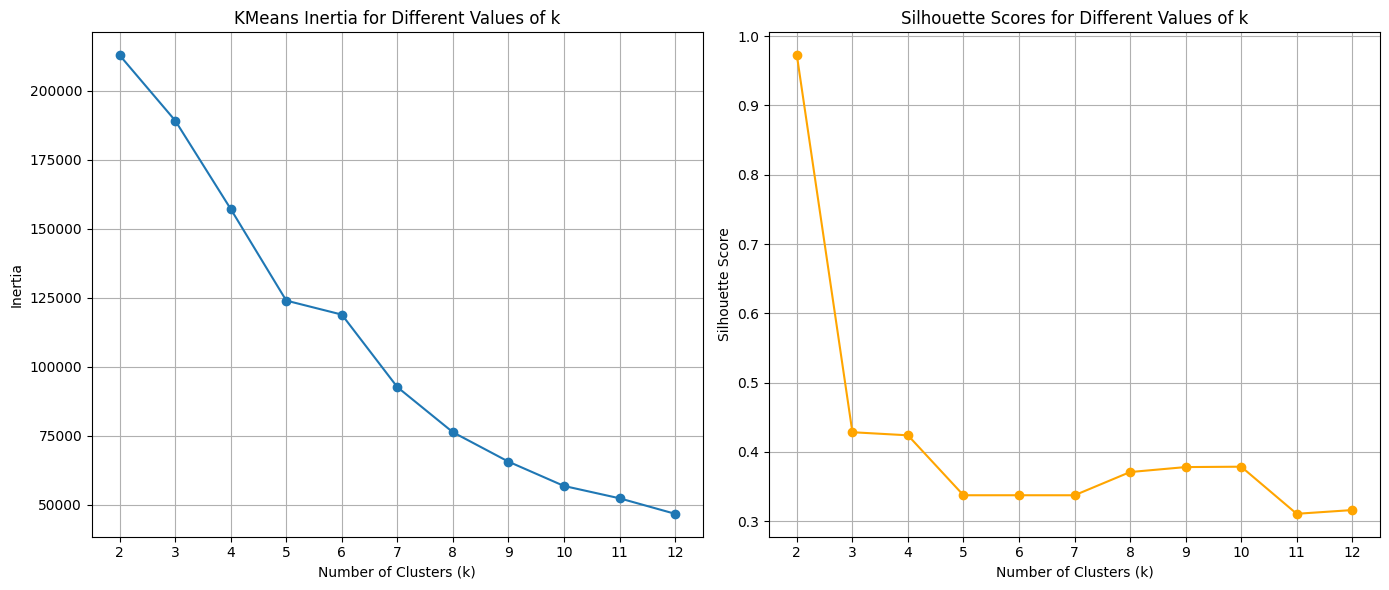

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

max_k = 12
inertia = []
silhouette_scores_list = []

k_values = range(2, max_k + 1)

num_features = ["price", "total_price", "Otaq sayƒ±", "Sah…ô", "Torpaq sah…ôsi", "floor", "total_floors", "price_per_sqm"]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(df[num_features])
    sil_score = silhouette_score(df[num_features], cluster_labels)
    silhouette_scores_list.append(sil_score)
    inertia.append(kmeans.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(k_values, inertia, marker="o")
axes[0].set_title('KMeans Inertia for Different Values of k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(k_values)
axes[0].grid(True)

axes[1].plot(k_values, silhouette_scores_list, marker="o", color="orange")
axes[1].set_title('Silhouette Scores for Different Values of k')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

plt.tight_layout()
plt.show()


 KMeans alqoritmasƒ±ndan istifad…ô ed…ôr…ôk, n_clusters=4 parametrini t…ôyin ed…ôr…ôk 4 klaster…ô ayƒ±rma …ôm…ôliyyatƒ±nƒ± h…ôyata ke√ßirir.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(df[num_features])
cluster_labels

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

Bu kod, KMeans alqoritmasƒ±nƒ± istifad…ô ed…ôr…ôk 3D Scatter Plot vizualizasiyasƒ± yaradaraq, …ômlaklarƒ± klasterl…ôr…ô ayƒ±rƒ±r v…ô klasterl…ôrin m√ºxt…ôlif x√ºsusiyy…ôtl…ôr…ô g√∂r…ô nec…ô qrupla≈üdƒ±ƒüƒ±nƒ± g√∂st…ôrir.

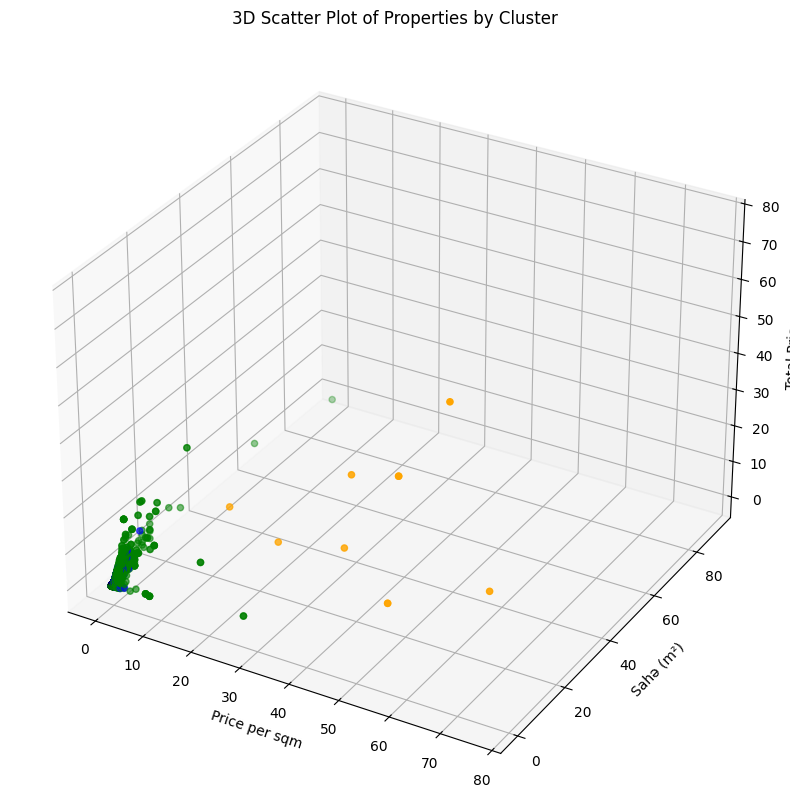

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

max_k = 12
inertia = []
silhouette_scores_list = []

k_values = range(2, max_k + 1)

num_features = ["price", "total_price", "Otaq sayƒ±", "Sah…ô", "Torpaq sah…ôsi", "floor", "total_floors", "price_per_sqm"]

best_k = 3

kmeans = KMeans(n_clusters=best_k, random_state=42, max_iter=1000)
df["Cluster"] = kmeans.fit_predict(df[num_features])

cluster_colors = {
    0: "blue",
    1: "orange",
    2: "green",
    3: "red"
}

colors = df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df['price_per_sqm'],  #
                     df['Sah…ô'],
                     df["total_price"],
                     c=colors,
                     marker='o')

ax.set_xlabel('Price per sqm')
ax.set_ylabel('Sah…ô (m¬≤)')
ax.set_zlabel('Total Price')
ax.set_title('3D Scatter Plot of Properties by Cluster')
plt.show()

Optimal K (klaster sayƒ±nƒ±) tapmaq √º√ß√ºn istifad…ô olunur.

In [ ]:
def optimal_k(inertia, silhouette_scores, max_clusters=10):

    if not inertia:
        return 3

    inertia_diff = np.diff(inertia)
    inertia_diff2 = np.diff(inertia_diff)

    elbow_k = np.argmin(inertia_diff2) + 2
    best_silhouette_k = np.argmax(silhouette_scores) + 2

    if abs(elbow_k - best_silhouette_k) > 2:
        final_k = round((elbow_k + best_silhouette_k) / 2)
    else:
        final_k = best_silhouette_k
    return final_k

best_k = optimal_k(inertia, silhouette_scores_list)
print(f"Optimal Klaster Sayƒ±: {best_k}")

,Optimal Klaster Sayƒ±: 3


Elbow Method istifad…ô ed…ôr…ôk optimal klaster sayƒ±nƒ± tapmaq v…ô sonra KMeans alqoritmasƒ± il…ô …ômlaklarƒ± bu klasterl…ôr…ô ayƒ±rmaq √º√ß√ºn yazƒ±lƒ±b.

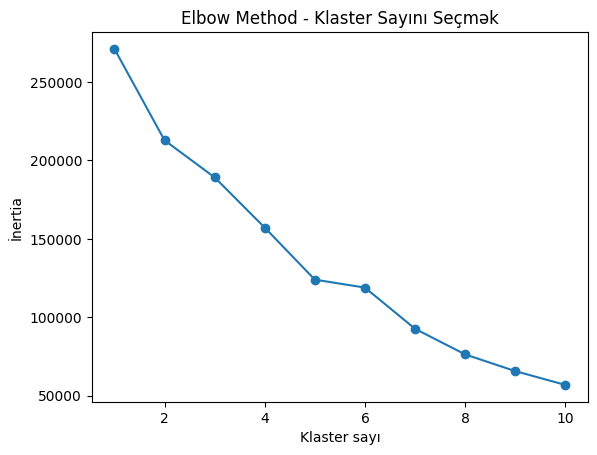

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

max_clusters = 10
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[num_features])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method - Klaster Sayƒ±nƒ± Se√ßm…ôk')
plt.xlabel('Klaster sayƒ±')
plt.ylabel('ƒ∞nertia')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df[num_features])

df['Cluster'] = kmeans.labels_

#Cluster Analizi

In [ ]:
cluster_means = df.groupby("Cluster")[num_features].mean()
print("Clusterl…ôrin Ortalamalarƒ±:")
print(cluster_means)

cluster_stats = df.groupby("Cluster")[num_features].describe()
print(" Klasterl…ôrin Statistik G√∂st…ôricil…ôri:")
print(cluster_stats)

Clusterl…ôrin Ortalamalarƒ±:
,             price  total_price  Otaq sayƒ±      Sah…ô  Torpaq sah…ôsi     floor  \
,Cluster                                                                         
,0        -0.093932    -0.093932   0.240733 -0.081364      -0.006091  0.196294   
,1        38.727025    38.727025  -1.283700 -0.284742      -0.016002 -0.722904   
,2         0.434688     0.434688  -1.299212  0.440580      -0.014910 -1.059692   
,3         0.045590     0.045590  -0.347589 -0.166838     126.590738 -1.077742   
,
,         total_floors  price_per_sqm  
,Cluster                               
,0            0.109727      -0.042852  
,1           -0.465031      53.174184  
,2           -0.592242       0.131131  
,3           -0.605070       0.100038  
, Klasterl…ôrin Statistik G√∂st…ôricil…ôri:
,           price                                                         \
,           count       mean        std        min        25%        50%   
,Cluster                              

In [ ]:
print(df.columns)  # DataFrame-d…ôki b√ºt√ºn s√ºtunlarƒ± g√∂st…ôrin

Index(['price', 'location', 'city', 'total_price', 'Kateqoriya', 'Otaq sayƒ±',
,       'Sah…ô', 'Torpaq sah…ôsi', 'T…ômir', 'floor', 'total_floors',
,       'price_per_sqm', 'Cluster'],
,      dtype='object')


Iki f…ôrqli vizualizasiya yaradƒ±r:Boxplot ve Violinplot.






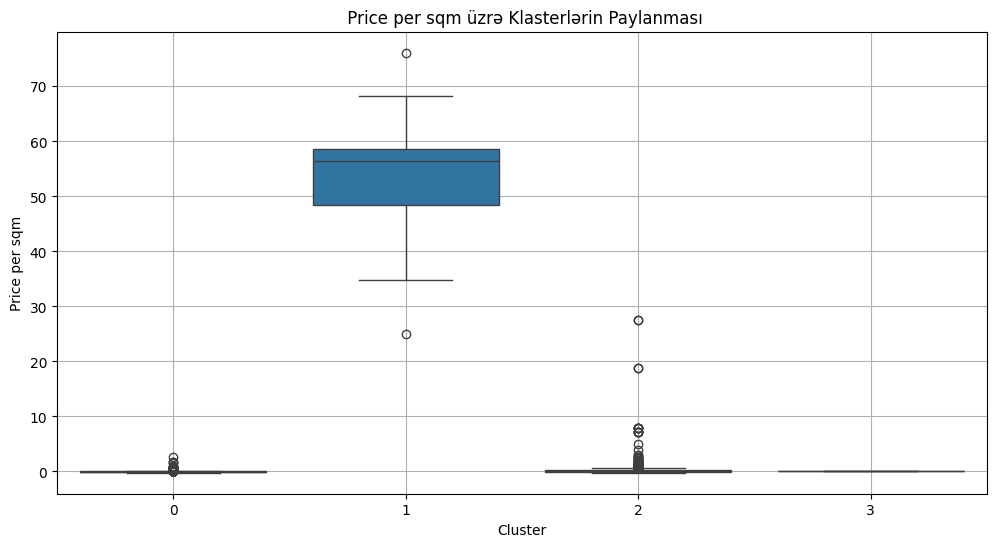

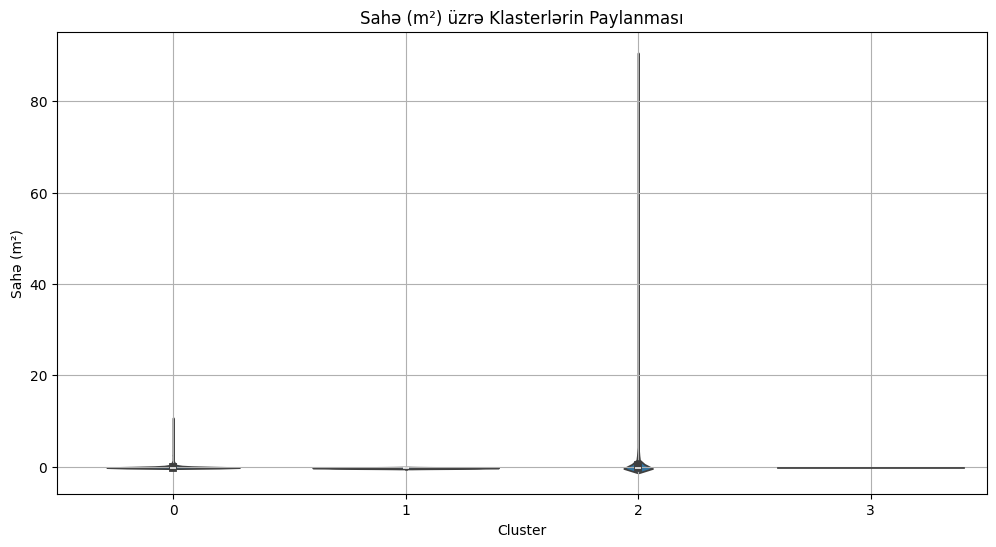

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Cluster"], y=df["price_per_sqm"])
plt.title(" Price per sqm √ºzr…ô Klasterl…ôrin Paylanmasƒ±")
plt.xlabel("Cluster")
plt.ylabel("Price per sqm")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Cluster"], y=df["Sah…ô"])
plt.title("Sah…ô (m¬≤) √ºzr…ô Klasterl…ôrin Paylanmasƒ±")
plt.xlabel("Cluster")
plt.ylabel("Sah…ô (m¬≤)")
plt.grid(True)
plt.show()

Bu kod multi-boxplot yaradƒ±r, y…ôni bir ne√ß…ô x√ºsusiyy…ôtin (features) h…ôr klaster √ºzr…ô paylanmasƒ±nƒ± m√ºqayis…ô edir.

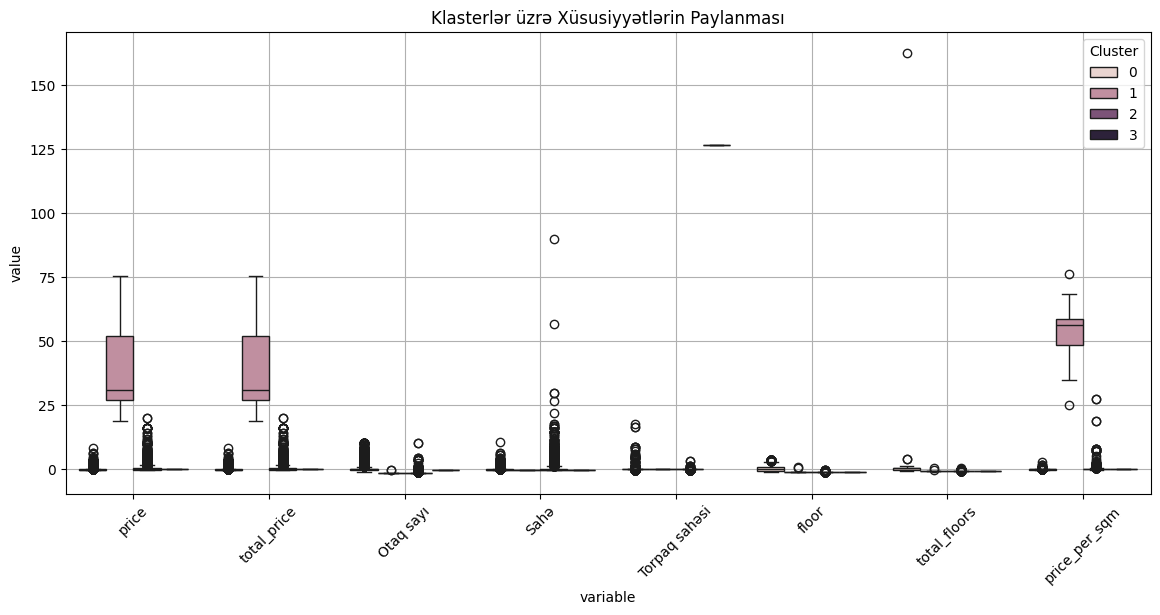

In [ ]:
df_melted = df.melt(id_vars=["Cluster"], value_vars=num_features)

plt.figure(figsize=(14, 6))
sns.boxplot(x="variable", y="value", hue="Cluster", data=df_melted)
plt.xticks(rotation=45)
plt.title("Klasterl…ôr √ºzr…ô X√ºsusiyy…ôtl…ôrin Paylanmasƒ±")
plt.grid(True)
plt.show()

#Vizuallasdirma

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
,  fig.canvas.print_figure(bytes_io, **kw)


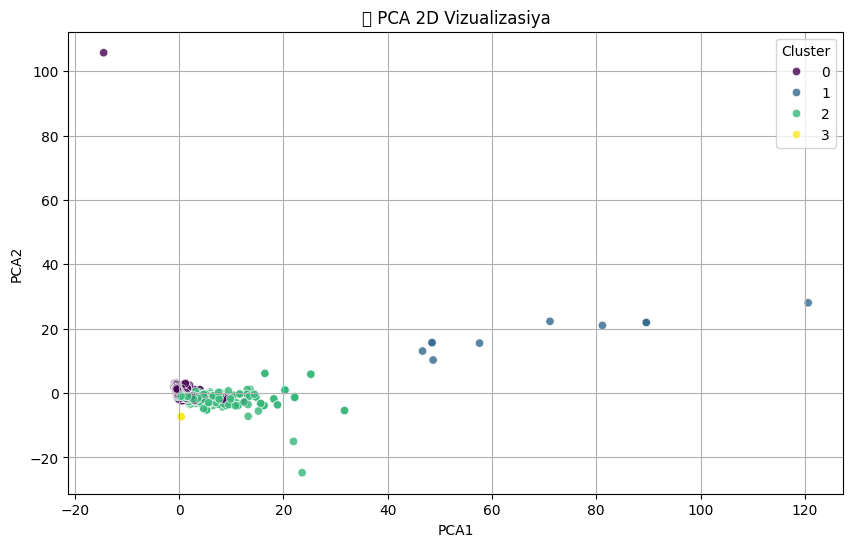

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA il…ô √∂l√ß√ºn√º 2D-…ô salƒ±rƒ±q
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(df[num_features])

df["PCA1"] = pca_result_2d[:, 0]
df["PCA2"] = pca_result_2d[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.8)
plt.title("üîπ PCA 2D Vizualizasiya")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
#KMeans klasterinq alqoritmini istifad…ô ed…ôr…ôk …ômlak m…ôlumatlarƒ±nƒ± 3 klaster…ô ayƒ±rƒ±r v…ô
#klaster etiketl…ôrini df DataFrame-in…ô …ôlav…ô edir.kmeans = KMeans(n_clusters=3, random_state=42)

df['cluster'] = kmeans.fit_predict(df[num_features])
print(df[['price', 'total_price', 'Otaq sayƒ±', 'Sah…ô', 'price_per_sqm', 'cluster']].head())

      price  total_price  Otaq sayƒ±      Sah…ô  price_per_sqm  cluster
,0 -0.320077    -0.320077   0.237480  0.127920      -0.207684        0
,1 -0.221320    -0.221320  -0.347589 -0.196916      -0.099023        0
,2 -0.057068    -0.057068   0.237480  0.043703      -0.081991        0
,3 -0.057068    -0.057068  -0.347589 -0.226993       0.079679        0
,4 -0.159726    -0.159726  -0.347589 -0.257071       0.006970        0


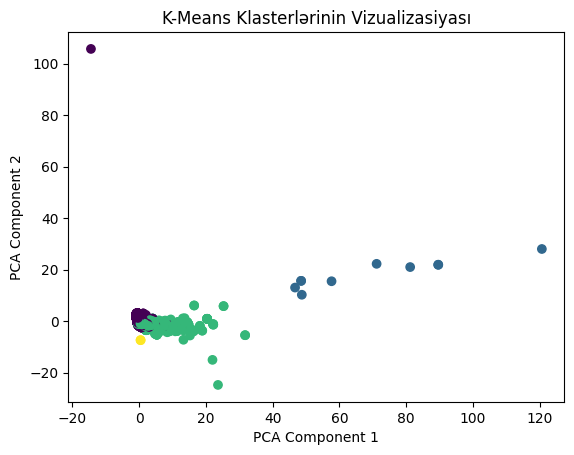

In [ ]:
#Principal Component Analysis (PCA) v…ô K-Means klasterinq n…ôtic…ôl…ôrini vizualla≈üdƒ±rmaq √º√ß√ºn istifad…ô edilir.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[num_features])

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Klasterl…ôrinin Vizualizasiyasƒ±')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
#Bu kod Davies-Bouldin Index (DBI) metrikasƒ±nƒ± hesablayaraq klasterl…ôrin keyfiyy…ôtini √∂l√ß√ºr.
from sklearn.metrics import davies_bouldin_score

df['cluster'] = kmeans.labels_

db_score = davies_bouldin_score(df[num_features], df['cluster'])
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 0.7728719948086017


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_features])

y_kmeans = kmeans.labels_

sil_score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {sil_score}")

db_score = davies_bouldin_score(X_scaled, y_kmeans)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.4239305660927875
,Davies-Bouldin Index: 0.7728719948086017


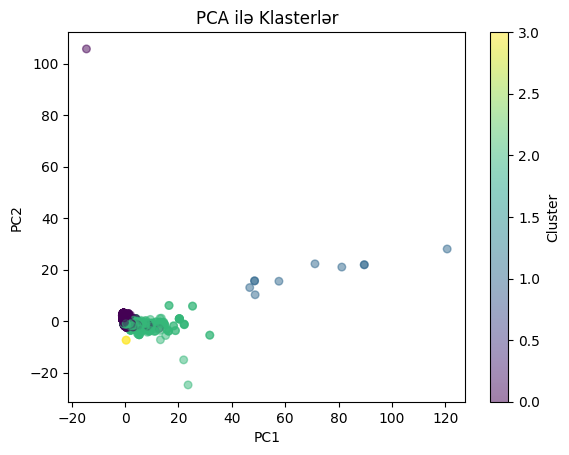

In [ ]:
#Principal Component Analysis (PCA) metodundan istifad…ô ed…ôr…ôk klasterl…ôrin 2D m√ºst…ôviy…ô proyeksiyasƒ±nƒ± vizualla≈üdƒ±rƒ±r.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_features])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df["Cluster"], cmap="viridis", s=30, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA il…ô Klasterl…ôr")
plt.colorbar(label='Cluster')
plt.show()